# Linear equations

In [13]:
import numpy as np

A = np.array((
    [ 2,-1],
    [-2, 1],
    [-1, 2]
))

B = np.array((
    [ 4,-3],
    [ 3, 5]
))

print("A=",A)
print()
print("B=",B)

# Matrix multiplication
# "matmul"
print()
print(f"AB = {A@B}")

# Invert matrix
A = np.array((
    [2,5],
    [1,3]
))
print("\n\n")
print("A=",A)
print("Inverse A=", np.linalg.inv(A))
print("Test Ainv A")
print(np.linalg.inv(A)@A)

# Transpose
print("\nTranspose of A:")
print(A.T)



A= [[ 2 -1]
 [-2  1]
 [-1  2]]

B= [[ 4 -3]
 [ 3  5]]

AB = [[  5 -11]
 [ -5  11]
 [  2  13]]



A= [[2 5]
 [1 3]]
Inverse A= [[ 3. -5.]
 [-1.  2.]]
Test Ainv A
[[1. 0.]
 [0. 1.]]

Transpose of A:
[[2 1]
 [5 3]]


# Linear regression example

In [15]:
import pandas as pd

df = pd.read_csv("londata.csv")
df.head()

,Utbildning,Lön
0,3.5,34652
1,2.9,33467
2,3.6,37553
3,4.5,41010
4,2.8,33506


In [28]:
# Change dataframe to numpy array with df.to_numpy()
# So that we can use the linear algebra tools numpy has

educ_time, y = df.to_numpy()[:,0], df.to_numpy()[:,1]

# so y are the incomes and educ_time are the corresponding 

# For linear regression we need to add a column of ones to the educ time matrix
# we need to transpose to the get lines and rows correctly arranged
X = np.vstack([np.ones(len(educ_time)), educ_time]).transpose()

# We want to compute a beta-vector, beta=beta0,beta1, which gives our
# linear approximation of these data
# Check your notes, we use the "magic equation" at once
#
# beta = inv(X.T X) @ X.T y

beta_hat = np.linalg.inv(X.T@X)@X.T@y

print(beta_hat)

y_hat = X@beta_hat

print(y_hat)


[20893.83571523  4703.603963  ]
[37356.44958573 34534.28720793 37826.80998203 42060.05354873
 34063.92681163 34063.92681163 42530.41394503 38767.53077463
 32652.84562273 37356.44958573 32652.84562273 32652.84562273
 35945.36839683 26067.80007453 27008.52086713 32182.48522643
 30301.04364123 36415.72879313 30771.40403753 28419.60205603
 42060.05354873 34063.92681163 35475.00800053 28419.60205603
 32652.84562273 35475.00800053 29360.32284863 36886.08918943
 32182.48522643 33593.56641533 32182.48522643 43941.49513393
 35004.64760423 29830.68324493 38767.53077463 29360.32284863
 35945.36839683 25597.43967823 28889.96245233 35945.36839683
 38297.17037833 35945.36839683 34534.28720793 33593.56641533
 27949.24165973 31712.12483013 32652.84562273 40178.61196353
 36415.72879313 26538.16047083 36415.72879313 33123.20601903
 31712.12483013 37826.80998203 39708.25156723 39237.89117093
 31241.76443383 33593.56641533 36415.72879313 39708.25156723
 32652.84562273 34063.92681163 29830.68324493 29360.3

With 0 years education you get 20893.83571522514 sek/month
For each year of education you earn 4703.6039630002915 sek/month more


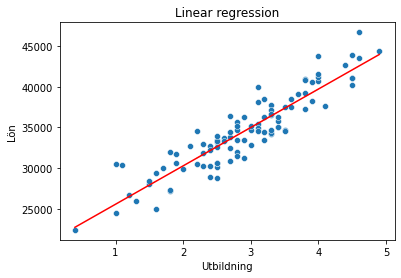

In [34]:
import seaborn as sns

ax = sns.lineplot(x=educ_time, y=y_hat, color="r")
ax = sns.scatterplot(data=df, x="Utbildning", y="Lön")

ax.set(title="Linear regression");

print(f"With 0 years education you get {beta_hat[0]} sek/month")
print(f"For each year of education you earn {beta_hat[1]} sek/month more")
